In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io as si #Used to load the OCTAVE *.mat files

In [2]:
data = si.loadmat('ex3data1.mat')
images,label = data['X'], data['y']  


In [3]:
label[label==10] = 0
# set the zero digit to 0, its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0

C:\Users\Fida Hussain\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


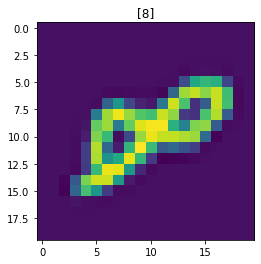

In [4]:
plt.imshow(images[4000].reshape(20,20))
plt.title(label[4000]);

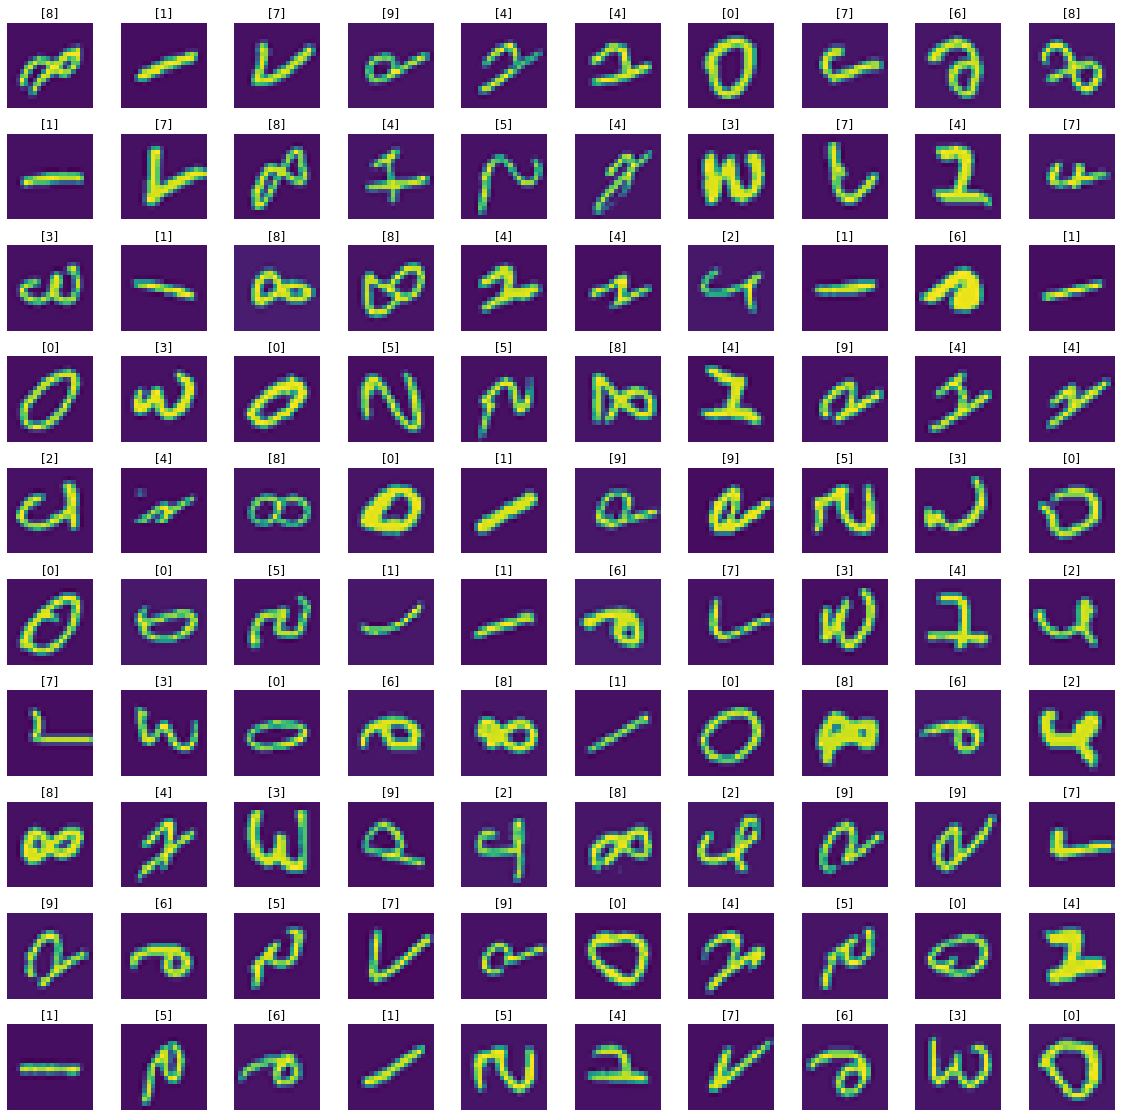

In [5]:
rows = 10
cols=10
fig, axes = plt.subplots(rows,cols, figsize=(20,20))
axes = axes.ravel()
training_data = len(images)
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(images[index].reshape(20,20))
    axes[i].axis('off')
    axes[i].set_title(label[index]);
plt.subplots_adjust(hspace=0.3)

* To test your vectorized logistic regression, we will use custom data as defined in the following cell.

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost_func(theta, x,y,lam):
    m=x.shape[0]
    z = np.dot(x,theta)
    h = sigmoid(z)
    j = -(1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))
    reg = (lam/(2*m)) * np.dot(theta[1:].T, theta[1:])
    J = j+reg
    return J

def gradient(theta,x,y, lam):
    m=x.shape[0]
    z = np.dot(x,theta)
    h = sigmoid(z)
    diff = h-y
    grad = (1/m) * np.dot(x.T, diff)
    grad[1:] = grad[1:] + (lam/m) * theta[1:]
    return grad

In [7]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J = cost_func(theta_t, X_t, y_t, 3)

In [8]:
J

array([[2.5348194]])

In [9]:
m,n = images.shape

In [10]:
images_ = np.append(np.ones((m,1)),images , axis=1)

In [11]:
theta = np.zeros((n+1,1))

In [12]:
cost_0 = cost_func(theta, images_, label, 1)

In [13]:
print('Cost', cost_0)

Cost [[142.64968976]]


# Evaluating when label is 1 

In [14]:
from scipy.optimize import fmin_tnc

In [15]:
y_=(label==1).astype('float')

In [16]:
y_.shape, images_.shape, theta.shape

((5000, 1), (5000, 401), (401, 1))

In [17]:
res = fmin_tnc(cost_func, theta.flatten(), gradient, args=(images_,y_.flatten(), 1))

In [18]:
temp = res[0]

In [19]:
cost_func(temp, images_,y_,1)

array([0.02696008])

# Classification on all the labels

In [20]:
num_labels = len(np.unique(label))

In [21]:
def oneVsAll(theta_, X, y, lam):   
    """Python version of oneVsAll.m."""
    all_theta = np.zeros((num_labels, n+1))
    for i in range(0, num_labels): # note that 0s are labeled with a y-value of 10 in this dataset.
        y_i_hot = (y == i).astype(np.float64)
        res = fmin_tnc(cost_func, theta_.flatten(), gradient, args=(X,y_i_hot.flatten(), 1))
        all_theta[i] = res[0]
    return all_theta

In [22]:
all_theta = oneVsAll(theta, images_, label,1)

# Evaluating

In [23]:
def prediction(all_theta, X):
    """Python version of predictOneVsAll.m."""
    return sigmoid(all_theta.dot(X.T)).T.argmax(axis=1)

def accuracy(all_theta, X, y):
    return np.mean(prediction(all_theta, X).reshape(-1,1) == y)

In [24]:
accuracy(all_theta, images_, label)

0.9446

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(label,prediction(all_theta,images_).reshape(-1,1)))
print()
print(classification_report(label,prediction(all_theta,images_).reshape(-1,1)))

[[496   0   0   0   1   1   1   0   1   0]
 [  0 493   1   0   0   5   0   0   1   0]
 [  2   4 459   4   7   2   2   4  13   3]
 [  0   3  10 454   0  16   1   6   5   5]
 [  0   2   1   0 477   0   4   0   4  12]
 [  3   1   3  11   6 458   5   0   9   4]
 [  2   2   0   0   0   6 489   0   1   0]
 [  2   3   2   0   4   1   0 475   1  12]
 [  0   8   6   6   5   7   2   1 460   5]
 [  5   1   3   5   4   3   1  14   2 462]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92    

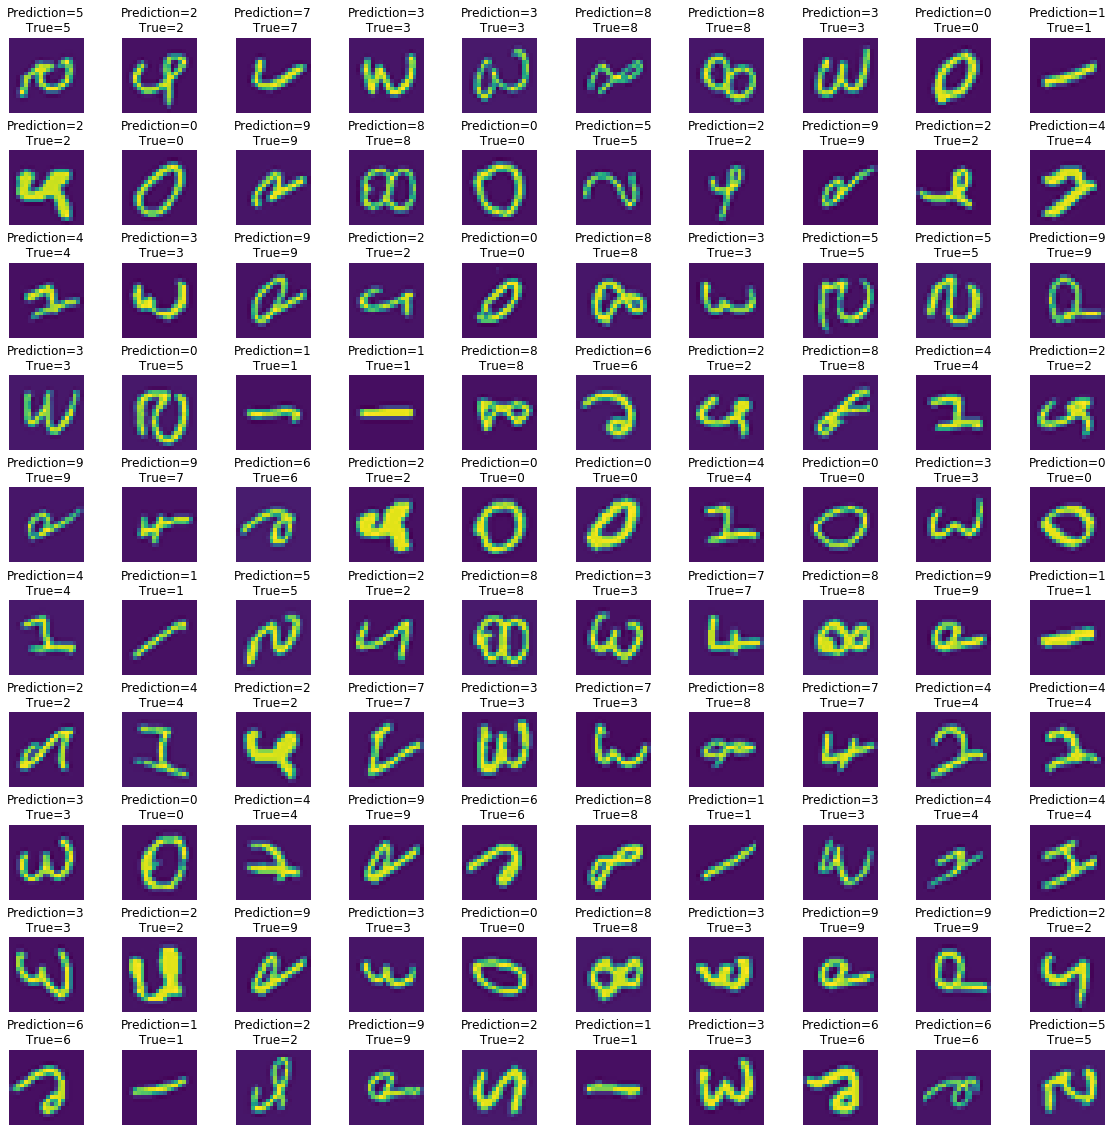

In [26]:
rows = 10
cols=10
fig, axes = plt.subplots(rows,cols, figsize=(20,20))
axes = axes.ravel()
training_data = len(images)
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(images[index].reshape(20,20))
    axes[i].axis('off')
    axes[i].set_title("Prediction={}\n True={}".format(prediction(all_theta,images_).reshape(-1,1)[index][0], label[index][0]))
plt.subplots_adjust(hspace=0.5)